## Detecting Phishing Websites: Machine Learning Approaches for Classification and Feature Extraction
### Applied Machine Learning, Group 16
### Nick Bohm, Simon Burke, Yonathan Daniel, Lara Karacasu, Vansh Murad Kalia

================================================================================================================================================================================================

#### Introduction

Phishing attacks are a prevalent problem in the digital age, with hundreds of thousands of individuals falling victim to these scams each year. 

Phishing is a cybercrime where scammers pose as reputable companies or institutions in order to trick victims into revealing sensitive data such as passwords or credit card information. Mechanisms for phishing include sending fraudulent emails, messages, phone calls, and more. One popular method for phishing is creating fake websites that impersonate genuine ones, subsequently collecting confidential information that users enter. 

While there is a lack of consensus on the definitive features that signify phishing websites, we will attempt to (1) build a classifier that accurately determines whether websites are phishing, and (2) extract the most important features for phishing prediction. Our project explores the detection of phishing websites from a machine learning perspective, using website features to accurately predict whether a website is a phishing site or a genuine site. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

We used the ‘PhishingWebsites’ dataset from OpenML.org. This dataset was originally sourced from the UC Irvine Machine Learning Repository. The data was compiled from PhishTank archive, MillerSmiles archive, and Google’s searching operators. It contains over 11,000 observations and 31 features. The features include: presence of IP address, URL length, port, pop up windows, page rank, favicon, web traffic, Google index, links that point to the page, and more. As determined during data analysis, there are two balanced classes for the target variable: phishing and non-phishing.

In [2]:

data = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data[0])

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


#### Exploratory Data Analysis

Initial data cleanup and missing data check

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


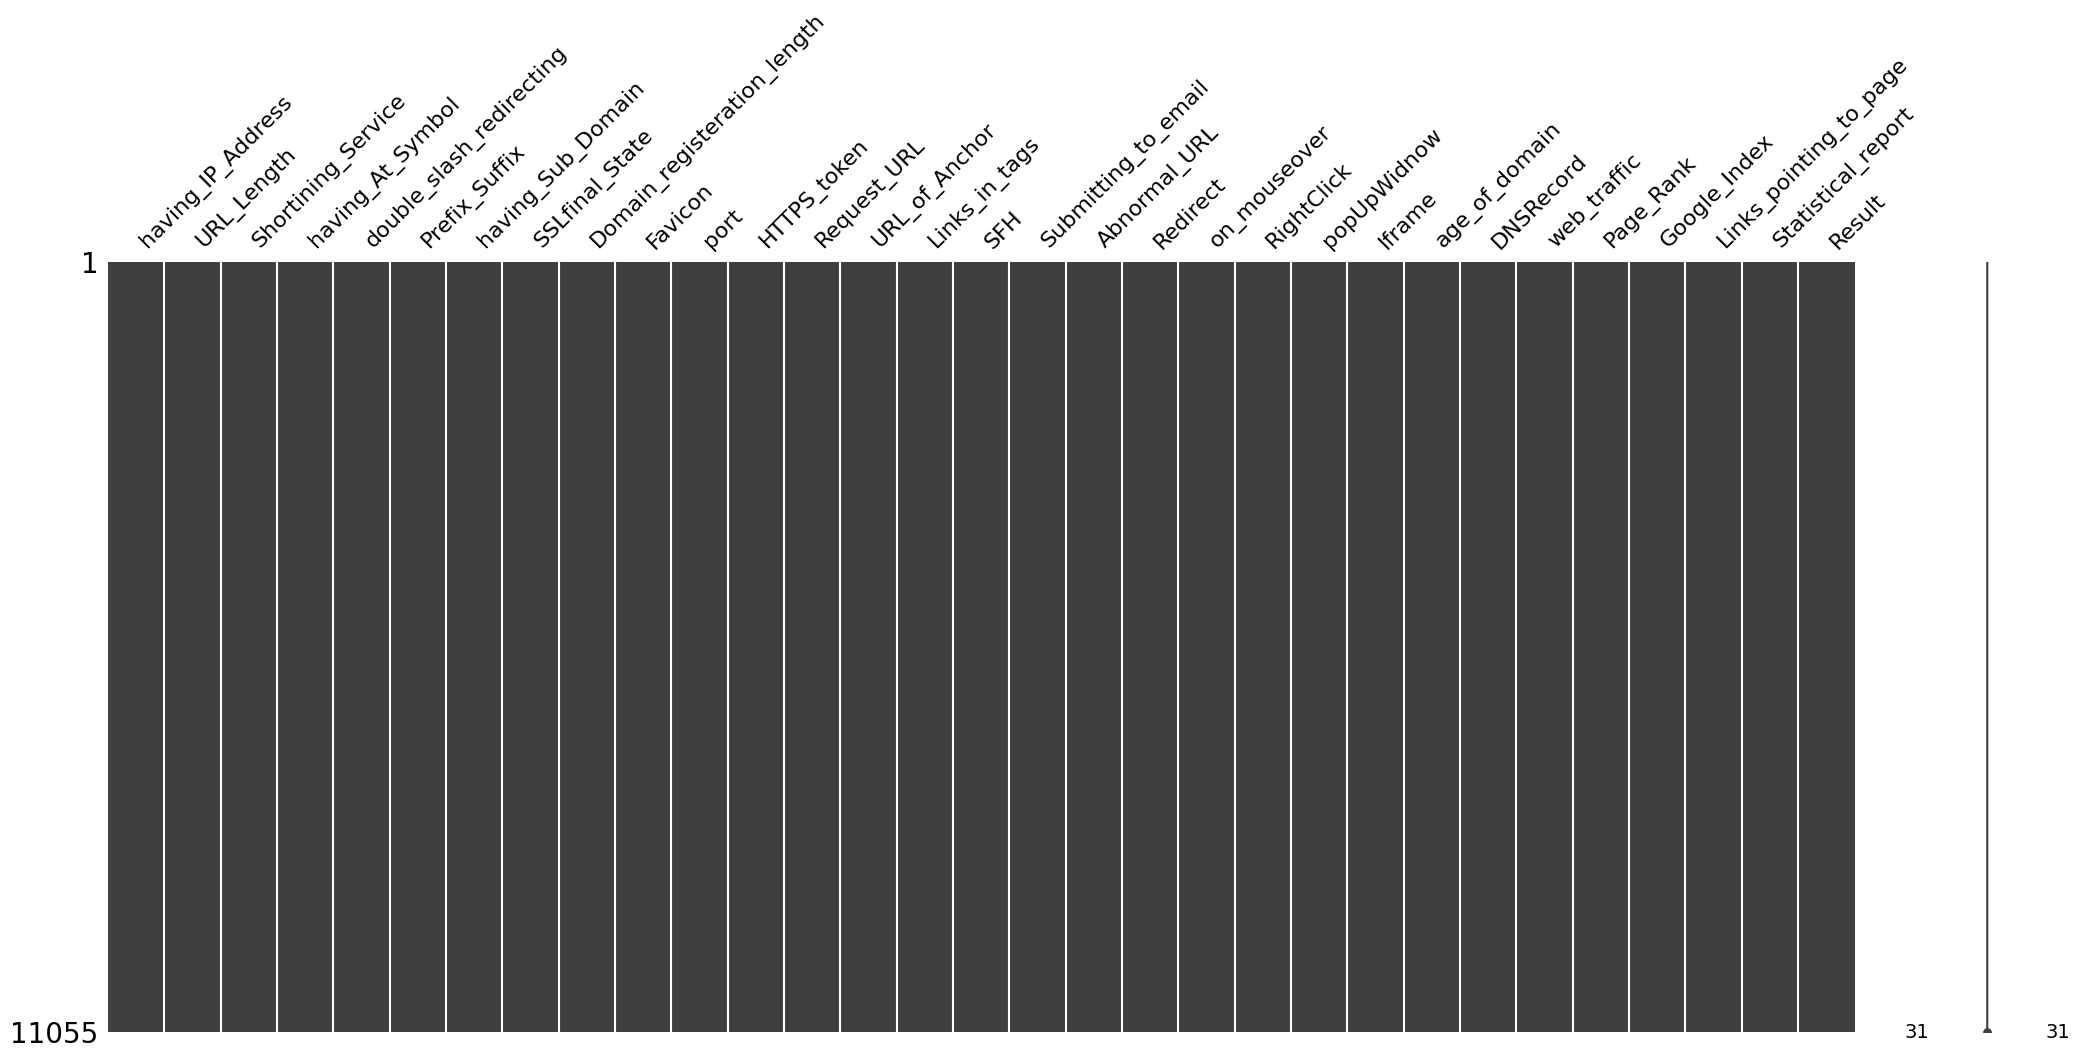

In [3]:
#missing data check

chart1 = msn.matrix(df)

#initial data cleanup, removed the b['']

df = df.apply(lambda col: col.str.decode('utf-8').str.strip("'"))
df.head()

Target variable description


count     11055
unique        2
top           1
freq       6157
Name: Result, dtype: object


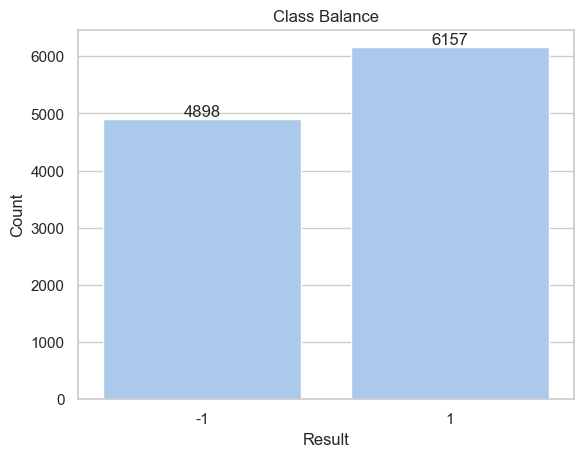

In [4]:

print(df['Result'].describe())

sns.set(style="whitegrid")
sns.set_palette("pastel")

chart1 = sns.countplot(x="Result", data=df)
plt.title("Class Balance")
plt.xlabel("Result")
plt.ylabel("Count")

for container in chart1.containers:
    chart1.bar_label(container)

plt.show()

In [5]:
for col in df:
  print(col)

having_IP_Address
URL_Length
Shortining_Service
having_At_Symbol
double_slash_redirecting
Prefix_Suffix
having_Sub_Domain
SSLfinal_State
Domain_registeration_length
Favicon
port
HTTPS_token
Request_URL
URL_of_Anchor
Links_in_tags
SFH
Submitting_to_email
Abnormal_URL
Redirect
on_mouseover
RightClick
popUpWidnow
Iframe
age_of_domain
DNSRecord
web_traffic
Page_Rank
Google_Index
Links_pointing_to_page
Statistical_report
Result


In [6]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


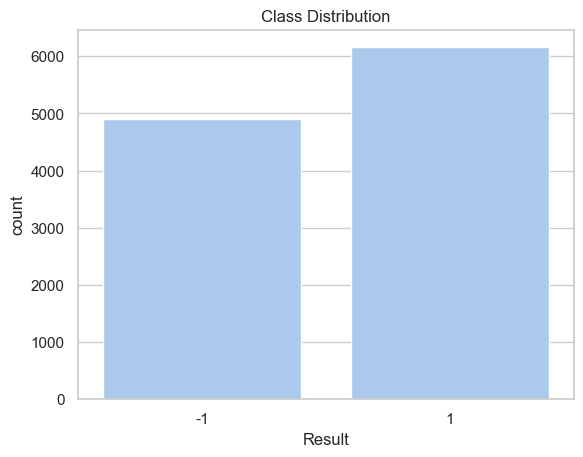

In [7]:
sns.countplot(x='Result', data=df)
plt.title("Class Distribution")
plt.show()

In [8]:
X = df.drop("Result", axis=1)
y = df["Result"]

# Feature selection using Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)

feature_importances = model.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
n_features = X.shape[1]

print("Feature Importances:")
for i in range(n_features):
    print(f"{X.columns[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]}")

Feature Importances:
SSLfinal_State: 0.28071821569001604
URL_of_Anchor: 0.26939835028814096
web_traffic: 0.06602380686171623
having_Sub_Domain: 0.05417146467245737
Prefix_Suffix: 0.04585916172048319
Links_in_tags: 0.041927777086571805
Request_URL: 0.02610987326630535
SFH: 0.023691286144159975
Links_pointing_to_page: 0.020161346760444492
Domain_registeration_length: 0.019023326438799646
age_of_domain: 0.016820685848329565
having_IP_Address: 0.014648844151990694
Google_Index: 0.013435446337658419
Page_Rank: 0.013162312332691321
DNSRecord: 0.012998264509658276
URL_Length: 0.009895822711961117
HTTPS_token: 0.006558212953968413
Redirect: 0.006520346925443598
popUpWidnow: 0.00637704275413186
Shortining_Service: 0.00636844974234811
Submitting_to_email: 0.006144267970413671
having_At_Symbol: 0.005835854566853627
Statistical_report: 0.005681326275340225
Abnormal_URL: 0.00565011713859441
Favicon: 0.005232638722598298
double_slash_redirecting: 0.005117652262747408
on_mouseover: 0.0047217855580916

Correlation matrices

Data Types:
having_IP_Address              object
URL_Length                     object
Shortining_Service             object
having_At_Symbol               object
double_slash_redirecting       object
Prefix_Suffix                  object
having_Sub_Domain              object
SSLfinal_State                 object
Domain_registeration_length    object
Favicon                        object
port                           object
HTTPS_token                    object
Request_URL                    object
URL_of_Anchor                  object
Links_in_tags                  object
SFH                            object
Submitting_to_email            object
Abnormal_URL                   object
Redirect                       object
on_mouseover                   object
RightClick                     object
popUpWidnow                    object
Iframe                         object
age_of_domain                  object
DNSRecord                      object
web_traffic                    object


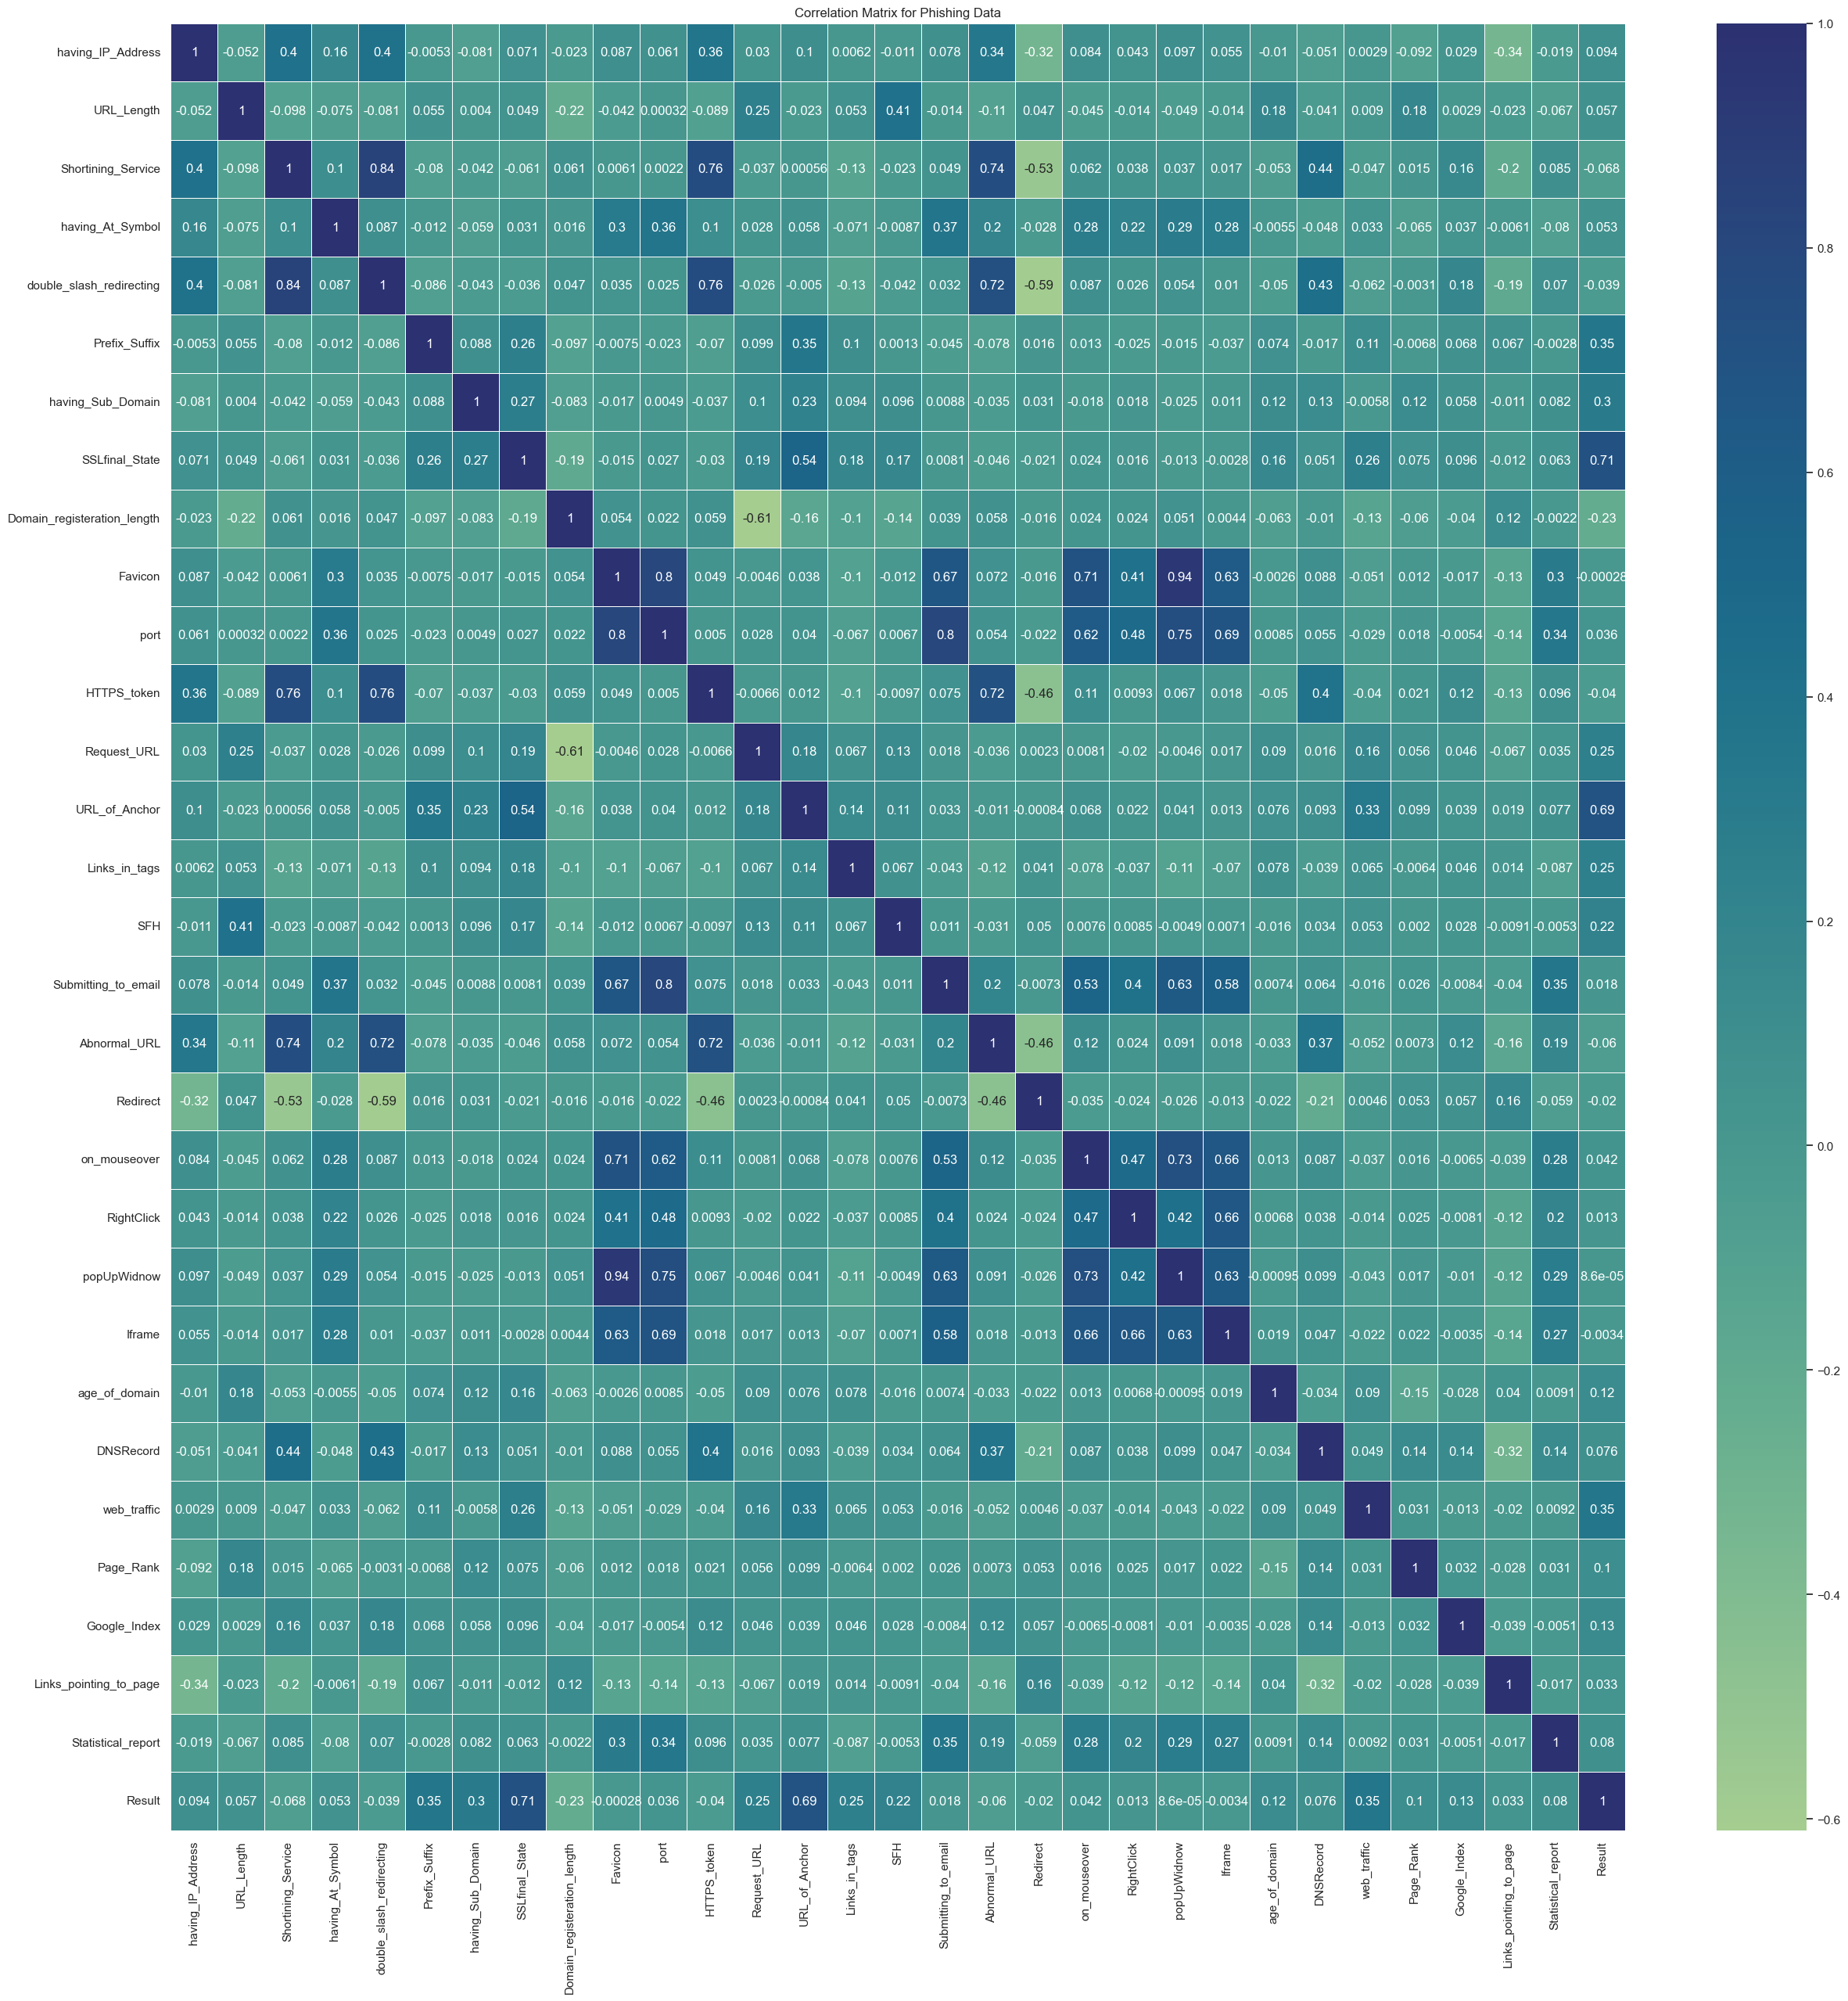

In [9]:
data_types = df.dtypes
print("Data Types:")
print(data_types)

label_encoder = LabelEncoder()
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix for Phishing Data')
plt.show()

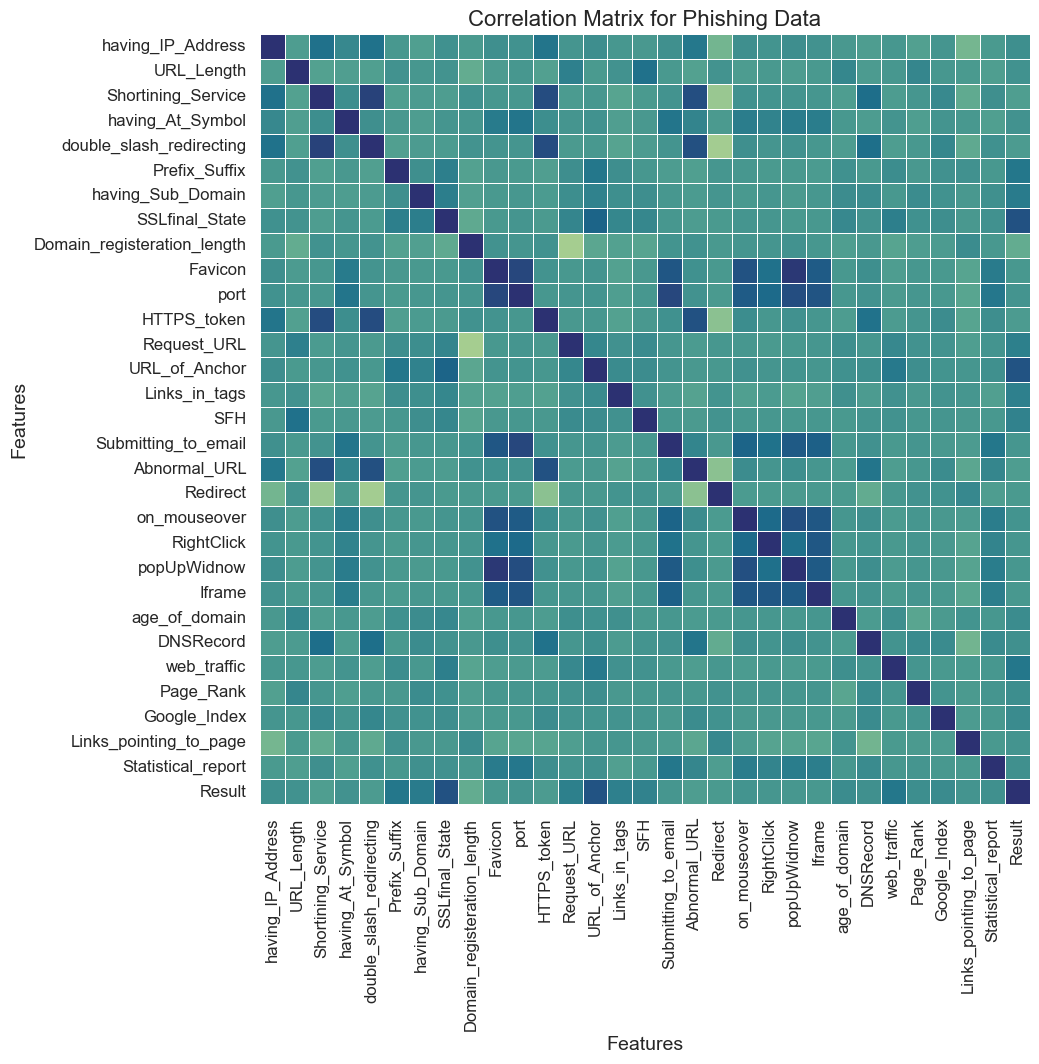

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='crest', linewidths=0.5, cbar=False, square=True)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Correlation Matrix for Phishing Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Calculate the percentage of non-zero values for each feature


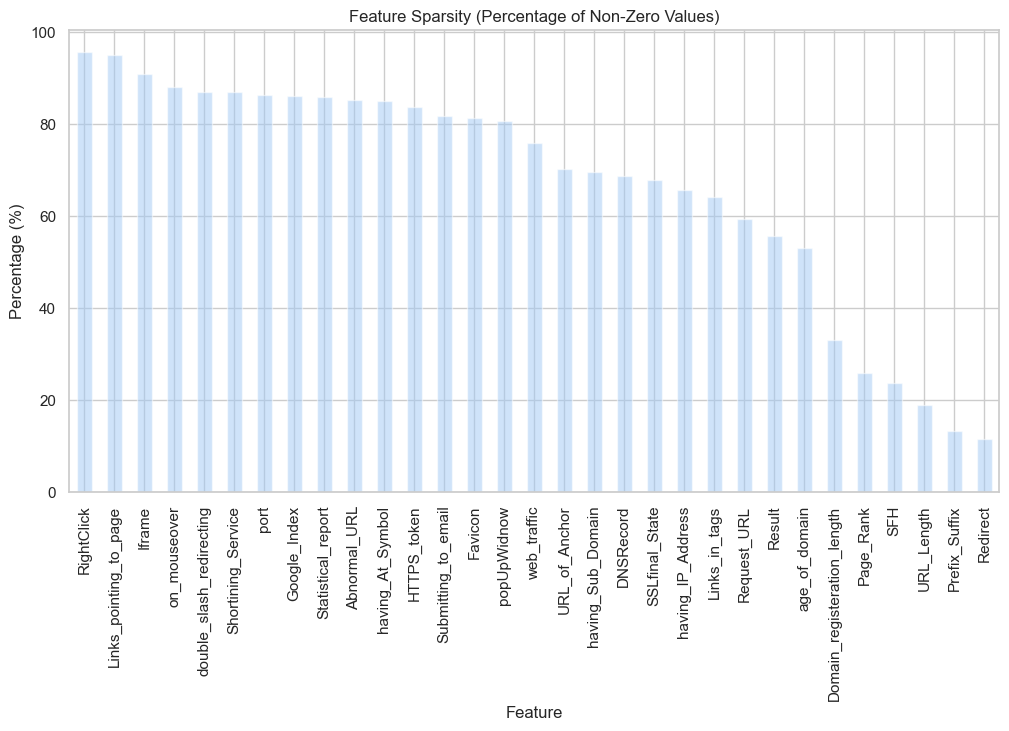

In [11]:
feature_sparsity = (df != 0).sum() / len(df) * 100
plt.figure(figsize=(12, 6))
feature_sparsity.sort_values(ascending=False).plot(kind='bar', alpha=0.5)
plt.title("Feature Sparsity (Percentage of Non-Zero Values)")
plt.xlabel("Feature")
plt.ylabel("Percentage (%)")
plt.show()

#### Proposed Methods

1. Decision Tree Model
2. Random Forest Model
3. XGBoost Model
4. Convolutional Neural Networks

#### Baseline Decision Tree

Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.tree import plot_tree
from sklearn.metrics import *

Load Data and Perform Preprocessing

In [13]:
data = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data[0])
df = df.apply(lambda col: col.str.decode('utf-8').str.strip("'"))
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [14]:
df.describe()
df = df.astype('int')

In [15]:
df['Result']

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

Train-Test Split

Note that there is no need to stratify because the data is balanced, as determined in preprocessing and EDA.

In [16]:
X = df.drop(['Result'], axis = 1)
y = df['Result']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X_dev shape: ", X_dev.shape)
print("y_dev shape: ", y_dev.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_dev shape:  (8844, 30)
y_dev shape:  (8844,)
X_test shape:  (2211, 30)
y_test shape:  (2211,)


Initialize and train the model

In [17]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_dev, y_dev)

DecisionTreeClassifier(random_state=1)

In [18]:
y_dev_pred = decision_tree.predict(X_dev) # predict on development
y_test_pred = decision_tree.predict(X_test) # predict on test

In [19]:
print("Train Set Summary for Decision Tree:")
print(classification_report(y_dev, y_dev_pred))

print("Test Set Summary for Decision Tree:")
print(classification_report(y_test, y_test_pred))

Train Set Summary for Decision Tree:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3902
           1       0.99      0.99      0.99      4942

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844

Test Set Summary for Decision Tree:
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       996
           1       0.97      0.96      0.97      1215

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



Plot decision tree

plt.figure(figsize=(80, 20))
plot_tree(decision_tree, max_depth=6, filled=True, feature_names=X.columns, class_names=True, rounded=True, fontsize=10)
plt.show()

Determine feature importances

In [20]:
importances = decision_tree.feature_importances_
pd.DataFrame(importances, X.columns).sort_values(by=0, ascending=False)

,0
SSLfinal_State,0.626292
URL_of_Anchor,0.109558
Links_in_tags,0.034795
web_traffic,0.029856
having_Sub_Domain,0.027126
Prefix_Suffix,0.023636
Links_pointing_to_page,0.022595
Request_URL,0.016784
age_of_domain,0.012514
having_IP_Address,0.011415


This result supports our initial data exploration correlation matrix, where it was found that SSLfinal_State had the highest correlation with phishing status, followed by URL_of_Anchor.

While the initial accuracy and precision of 0.96 for the decision tree is already quite good, can we improve it by performing tuning and training more complex models? Let's start out by performing pruning on the baseline decision tree.

In [21]:
path = decision_tree.cost_complexity_pruning_path(X_dev, y_dev)
ccp_alphas = path.ccp_alphas
best_ccp_alpha = 0
best_recall = 0
best_precision = 0

for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_dev, y_dev)
    predictions = pruned_tree.predict(X_dev)
    recall = recall_score(y_dev, predictions)
    precision = precision_score(y_dev, predictions)
    
    if recall >= best_recall and precision >= best_precision:
        best_recall = recall
        best_precision = precision
        best_ccp_alpha = ccp_alpha

best_tree = DecisionTreeClassifier(random_state=1, ccp_alpha = best_ccp_alpha)
best_tree.fit(X_dev, y_dev)

pruned_Y_development_pred = best_tree.predict(X_dev) # predict on development
pruned_Y_test_pred = best_tree.predict(X_test) # predict on test

for label in set(y_dev):
    if label not in pruned_Y_development_pred:
        print(f"No predicted samples for class {label} in the development set.")

for label in set(y_test):
    if label not in pruned_Y_test_pred:
        print(f"No predicted samples for class {label} in the test set.")

print("Train Set Summary for Pruned Decision Tree:")
print(classification_report(y_dev, pruned_Y_development_pred))

print("Test Set Summary for Pruned Decision Tree:")
print(classification_report(y_test, pruned_Y_test_pred))

Train Set Summary for Pruned Decision Tree:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3902
           1       0.99      0.99      0.99      4942

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844

Test Set Summary for Pruned Decision Tree:
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       996
           1       0.97      0.96      0.97      1215

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



The pruned tree performance is about the same as the baseline decision tree. Let's try random forests to see if we can prevent overfitting.

#### Random Forest

Initialize and Train Model

In [22]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_dev, y_dev)
rf_pred = rf.predict(X_dev)

y_dev_pred = rf.predict(X_dev) # predict on development
y_test_pred = rf.predict(X_test) # predict on test

In [23]:
print("Train Set Summary for Decision Tree:")
print(classification_report(y_dev, y_dev_pred))

print("Test Set Summary for Decision Tree:")
print(classification_report(y_test, y_test_pred))


Train Set Summary for Decision Tree:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3902
           1       0.99      0.99      0.99      4942

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844

Test Set Summary for Decision Tree:
              precision    recall  f1-score   support

          -1       0.98      0.97      0.97       996
           1       0.97      0.98      0.98      1215

    accuracy                           0.98      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.98      0.98      0.98      2211



In [24]:
param_grid = {
    'max_depth': [None, 1, 2, 10],
    'max_features': [None, 1, 2],
    'n_estimators': [1, 10, 50, 100, 500]
}

rand = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rand, param_grid, cv=5, scoring='recall')
grid_search.fit(X_dev, y_dev)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 1, 'max_features': 1, 'n_estimators': 50}


In [25]:
optimal_rf = RandomForestClassifier(max_depth = 1, max_features = 1, n_estimators = 50, random_state = 1)
optimal_rf.fit(X_dev, y_dev)
optimal_rf_pred = optimal_rf.predict(X_test)

print(classification_report(y_test, optimal_rf_pred))


              precision    recall  f1-score   support

          -1       1.00      0.13      0.23       996
           1       0.58      1.00      0.74      1215

    accuracy                           0.61      2211
   macro avg       0.79      0.57      0.49      2211
weighted avg       0.77      0.61      0.51      2211



It seems like we were able to optimize recall, but the other metrics have gone down significantly. Can we improve recall without driving down all other metrics so drastically? Let's try optimizing for F1-score instead.

In [26]:
param_grid = {
    'max_depth': [None, 1, 2, 10, 50],
    'max_features': [None, 1, 2, 5, 10],
    'n_estimators': [1, 10, 50, 100, 500]
}

rand = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rand, param_grid, cv=5, scoring='f1')
grid_search.fit(X_dev, y_dev)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'max_features': 5, 'n_estimators': 50}


In [27]:
optimal_rf = RandomForestClassifier(max_depth = None, max_features = 5, n_estimators = 50, random_state = 1)
optimal_rf.fit(X_dev, y_dev)
optimal_rf_pred = optimal_rf.predict(X_test)

print(classification_report(y_test, optimal_rf_pred))


              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       996
           1       0.97      0.98      0.97      1215

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [28]:
importances = optimal_rf.feature_importances_
pd.DataFrame(importances, X.columns).sort_values(by=0, ascending=False)

,0
SSLfinal_State,0.334047
URL_of_Anchor,0.212272
web_traffic,0.083015
having_Sub_Domain,0.067586
Prefix_Suffix,0.047689
Links_in_tags,0.042420
Request_URL,0.022846
Links_pointing_to_page,0.019796
SFH,0.018612
age_of_domain,0.016393


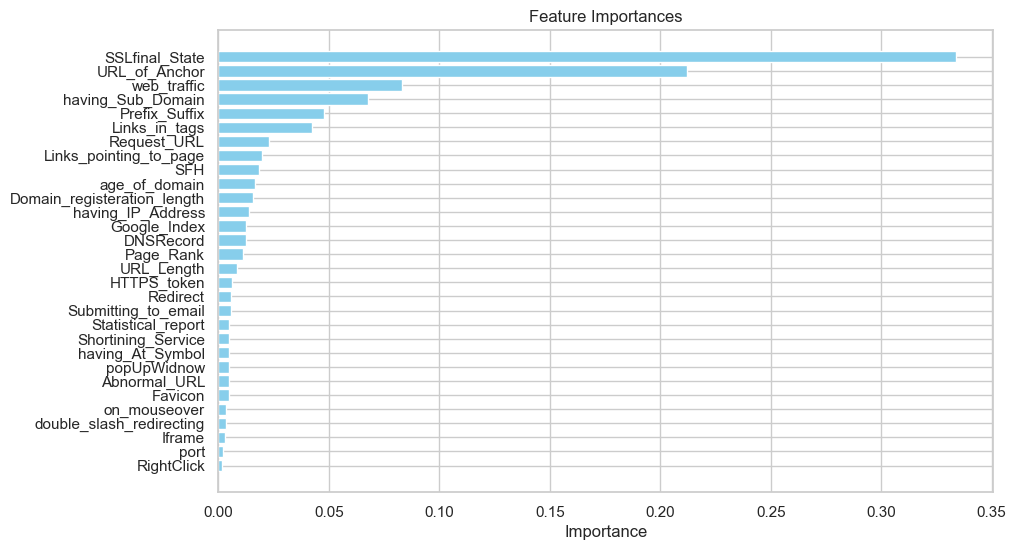

In [29]:
feature_names = X.columns
sorted_importances = pd.DataFrame(importances, feature_names).sort_values(by=0, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_importances.index, sorted_importances[0], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

Notably, the top two most important features in the baseline decision tree have remained the same for the random forest: SSLfinal_State	and URL_of_Anchor.

#### XGBoost

In [30]:
data = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data[0])
df = df.apply(lambda col: col.str.decode('utf-8').str.strip("'"))

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [31]:
X = df.drop("Result", axis=1)
Y = df['Result']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
Y_train = Y_train.astype(float)
Y_test = Y_test.astype(float)

print(X_train.shape)
print(Y_train.shape)

(8844, 30)
(8844,)


Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation.

In [34]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd


X = df.drop("Result", axis=1)
Y = df['Result'].astype(int)  


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Y_train = Y_train.map({-1: 0, 1: 1})
Y_test = Y_test.map({-1: 0, 1: 1})


X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}


xgb_grid_search = GridSearchCV(
    xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb,
    cv=10,
    scoring='f1',
    n_jobs=-1
)


xgb_grid_search.fit(X_train, Y_train)


best_model = xgb_grid_search.best_estimator_


xgb_optimal_preds = best_model.predict(X_test)


print("\nXGBoost Test Set Metrics:")
print(classification_report(Y_test, xgb_optimal_preds))
print("ROC-AUC Score:", roc_auc_score(Y_test, xgb_optimal_preds))


XGBoost Test Set Metrics:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       956
           1       0.97      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

ROC-AUC Score: 0.9678241010851989


List the top 3 features from the trained XGBoost model

In [35]:
feature_importances = best_model.feature_importances_


feature_names = X_train.columns.tolist()


top_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)[:3]


print("Top 3 Features from XGBoost:")
for rank, (feature, importance) in enumerate(top_features, start=1):
    print(f"{rank}. {feature}: {importance:.4f}")


Top 3 Features from XGBoost:
1. SSLfinal_State: 0.4597
2. URL_of_Anchor: 0.1646
3. Prefix_Suffix: 0.0880


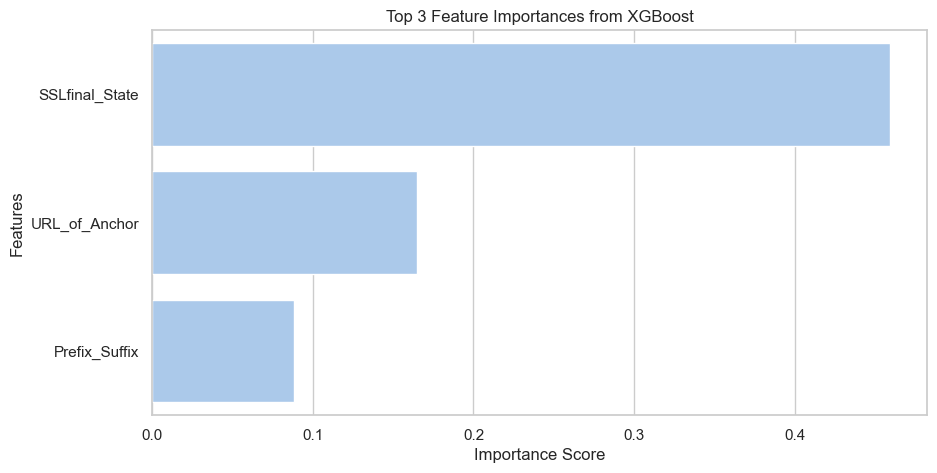

In [36]:
top_3_features_xgb = top_features[:3]

features_xgb, importances_xgb = zip(*top_3_features_xgb)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(importances_xgb), y=list(features_xgb))
plt.title("Top 3 Feature Importances from XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


Choose the top 7 features (as given by feature importances from XGBoost) and repeat Training

In [37]:
top_7_features_xgb = top_features[:7]
features_xgb_7, _ = zip(*top_7_features_xgb)


X_train_7 = X_train[list(features_xgb_7)]
X_test_7 = X_test[list(features_xgb_7)]


xgb_optimal_7 = GridSearchCV(
    xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb, 
    cv=10, 
    scoring='f1', 
    n_jobs=-1
)

xgb_optimal_7.fit(X_train_7, Y_train)

xgb_optimal_7_best = xgb_optimal_7.best_estimator_


test_preds_7 = xgb_optimal_7_best.predict(X_test_7)


print("Performance Metrics for XGBoost with Top 7 Features:")
print(classification_report(Y_test, test_preds_7))
print("ROC-AUC Score:", roc_auc_score(Y_test, test_preds_7))



Performance Metrics for XGBoost with Top 7 Features:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       956
           1       0.92      0.95      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.92      2211
weighted avg       0.93      0.93      0.93      2211

ROC-AUC Score: 0.9218269182683493


#### Convolutional Neural Network Model

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
import tensorflow as tf
from tensorflow.keras import layers, models

In [60]:
data = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data[0])
df = df.apply(lambda col: col.str.decode('utf-8').str.strip("'"))

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [61]:
X = df.drop("Result", axis=1)
Y = df['Result']
map = {1:1, -1:0}

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
Y_test = Y_test.astype(float)
Y_train = Y_train.astype(float)
Y_train = np.array([map[y] for y in Y_train]).astype(float)
Y_test = np.array([map[y] for y in Y_test]).astype(float)

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Reshape the input data to be 3D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = models.Sequential()

model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))


model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=50, batch_size=64)

Epoch 1/50
139/139 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8602
Epoch 2/50
139/139 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9267
Epoch 3/50
139/139 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9301
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9345
Epoch 5/50
139/139 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9384
Epoch 6/50
139/139 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9426
Epoch 7/50
139/139 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9441
Epoch 8/50
139/139 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9430
Epoch 9/50
139/139 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9482
Epoch 10/50
139/139 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.9479

In [63]:

predictions = model.predict(X_test)
Y_test = np.array([map[y] for y in Y_test]).astype(np.float64)
predictions_binary = np.round(predictions)
accuracy = accuracy_score(Y_test, predictions_binary)
precision = precision_score(Y_test, predictions_binary, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


70/70 [==============================] - 0s 1ms/step


KeyError: 0.0

 Attempts at improving the score for the above base model

In [64]:
#Preprocessing data again to train a new model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
Y_train = Y_train.astype(float)
Y_test = Y_test.astype(float)
Y_train = np.array([map[y] for y in Y_train]).astype(float)
Y_test = np.array([map[y] for y in Y_test]).astype(float)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


New Model


In [65]:
model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(32, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

predictions = model.predict(X_test)
predictions_binary = np.round(predictions)
accuracy = accuracy_score(Y_test, predictions_binary)
precision = precision_score(Y_test, predictions_binary, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


Epoch 1/50
111/111 [==============================] - 1s 4ms/step - loss: 0.4397 - accuracy: 0.7969 - val_loss: 0.2314 - val_accuracy: 0.9129
Epoch 2/50
111/111 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.9013 - val_loss: 0.1928 - val_accuracy: 0.9310
Epoch 3/50
111/111 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9186 - val_loss: 0.1783 - val_accuracy: 0.9373
Epoch 4/50
111/111 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9257 - val_loss: 0.1765 - val_accuracy: 0.9333
Epoch 5/50
111/111 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.9261 - val_loss: 0.1701 - val_accuracy: 0.9265
Epoch 6/50
111/111 [==============================] - 0s 3ms/step - loss: 0.1768 - accuracy: 0.9269 - val_loss: 0.1630 - val_accuracy: 0.9344
Epoch 7/50
111/111 [==============================] - 0s 3ms/step - loss: 0.1662 - accuracy: 0.9329 - val_loss: 0.1573 - val_accuracy: 0.9299
Epoch 

Plot training history

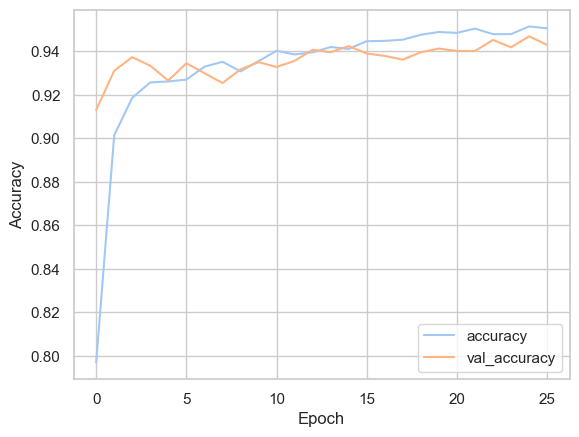

In [67]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
